In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.20G/5.20G [04:10<00:00, 19.3MB/s]
100% 5.20G/5.20G [04:10<00:00, 22.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/skin-cancer-mnist-ham10000.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tabular_data = pd.read_csv('/content/HAM10000_metadata.csv')
tabular_data.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


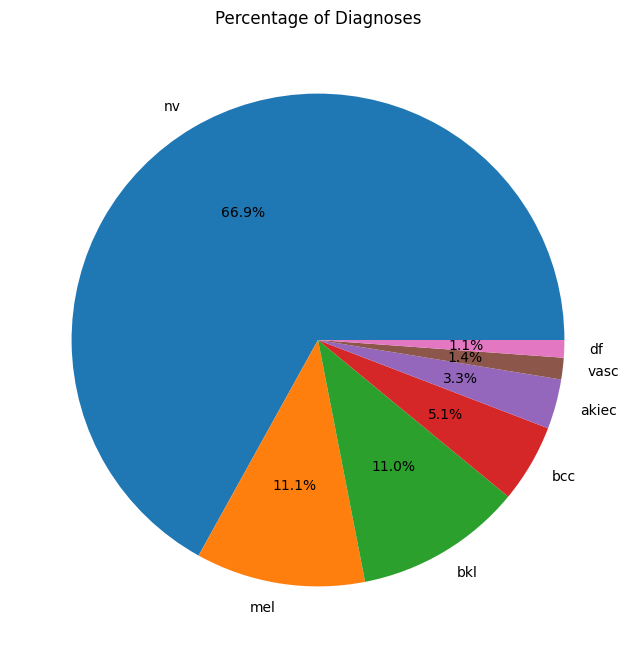

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each diagnosis
dx_counts = tabular_data['dx'].value_counts()



# Pie chart
dx_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Percentage of Diagnoses')
plt.ylabel('')  # Hide y-axis label for better appearance
plt.show()


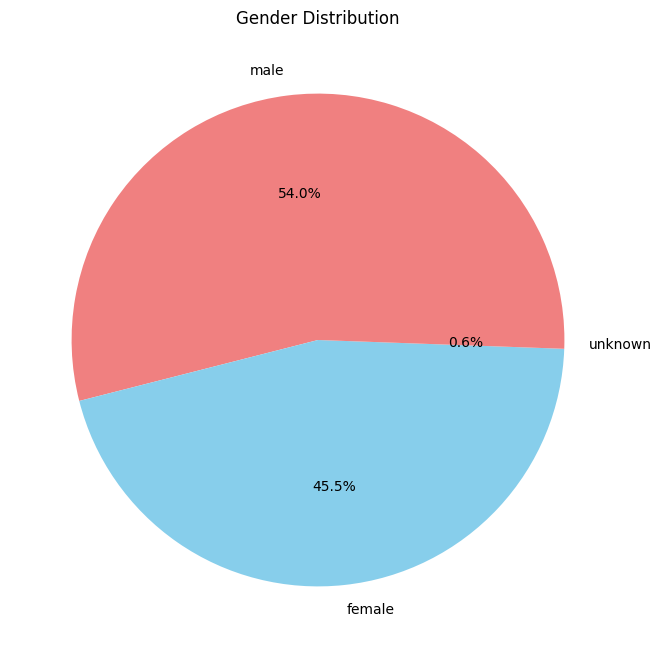

In [ ]:
# Count occurrences of each sex
sex_counts = tabular_data['sex'].value_counts()

# Pie chart
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], figsize=(8, 8))
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


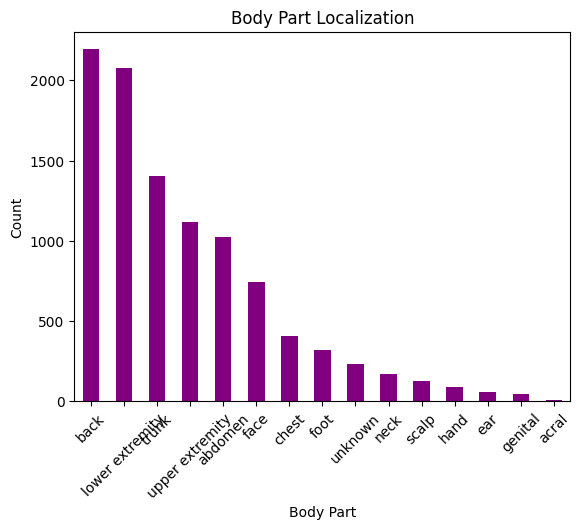

In [ ]:
# Count occurrences of each localization
localization_counts = tabular_data['localization'].value_counts()

# Bar chart
localization_counts.plot(kind='bar', color='purple')
plt.title('Body Part Localization')
plt.xlabel('Body Part')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-9-3dabcc51b61f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dx', y='age', data=tabular_data, palette='pastel')


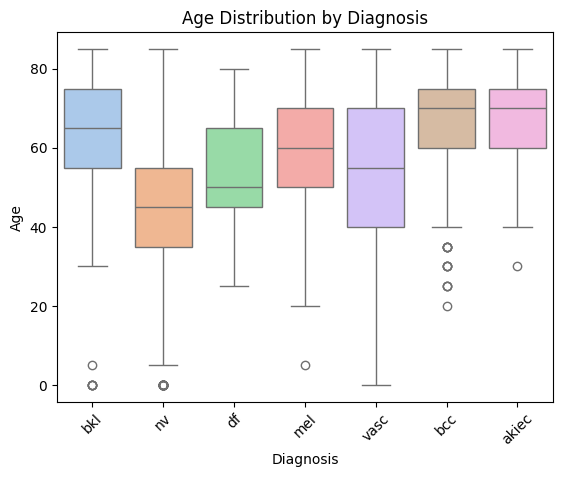

In [ ]:
sns.boxplot(x='dx', y='age', data=tabular_data, palette='pastel')
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
data = pd.read_csv('/content/hmnist_28_28_RGB.csv')
data.head(5)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [ ]:
# Separate features (pixels) and labels
X = data.drop(columns=['label']).values
y = data['label'].values

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Oversampling to Overcome Class Imbalance
oversample = RandomOverSampler()
X, y = oversample.fit_resample(X, y)
X = np.array(X).reshape(-1, 28, 28, 3)
print('Shape of X after oversampling:', X.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Shape of X after oversampling: (46935, 28, 28, 3)


In [ ]:
# Standardizing Data
X = (X - np.mean(X)) / np.std(X)

In [ ]:
# Splitting Data into Training and Testing Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f'Training set size: {X_train.shape}, Testing set size: {X_test.shape}')

Training set size: (37548, 28, 28, 3), Testing set size: (9387, 28, 28, 3)


In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential
# Building the CNN Model
model = Sequential([
    Input(shape=(28, 28, 3)),           # Input layer defining the shape
    Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,663 (713.53 KB)

 Trainable params: 182,663 (713.53 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',  # changed to `.keras` extension
    monitor='val_accuracy',       # monitoring validation accuracy
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
# Compiling the Model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Training the Model
history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=20,
    callbacks=[callback]
)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3822 - loss: 1.5490
Epoch 1: val_accuracy improved from -inf to 0.69361, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.3827 - loss: 1.5478 - val_accuracy: 0.6936 - val_loss: 0.8535
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7333 - loss: 0.7352
Epoch 2: val_accuracy improved from 0.69361 to 0.82144, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7334 - loss: 0.7348 - val_accuracy: 0.8214 - val_loss: 0.5165
Epoch 3/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8418 - loss: 0.4415
Epoch 3: val_accuracy improved from 0.82144 to 0.84474, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8419 - loss: 0.4412 - val_accuracy: 0.8447 - val_loss: 0.4367
Epoch 4/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8936 - loss: 0.3043
Epoch 4: val_accuracy improved from 0

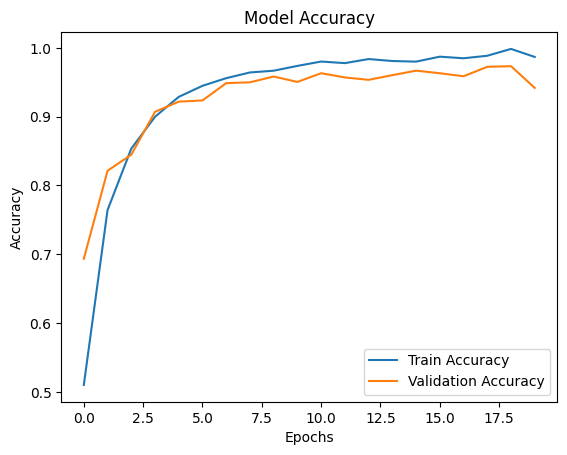

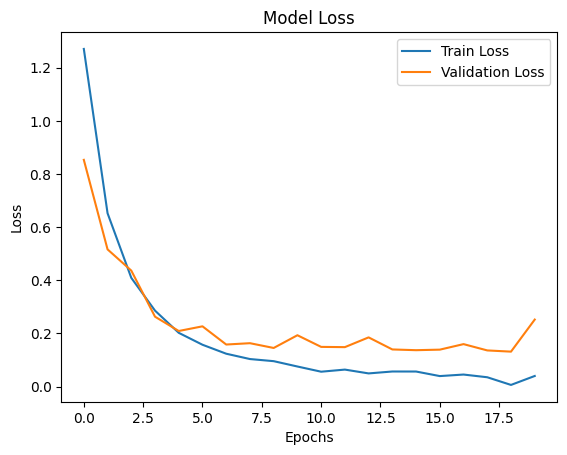

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=1)

# Print test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9418 - loss: 0.2754
Test Loss: 0.2670
Test Accuracy: 94.16%


In [ ]:
# Define class names based on the dataset
class_names = ['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predicting the classes for X_test
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Evaluate accuracy
accuracy = accuracy_score(Y_test, predicted_classes)
print(f'Accuracy on Test Set: {accuracy * 100:.2f}%')

# Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(Y_test, predicted_classes, target_names=class_names))


294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy on Test Set: 94.16%

Classification Report:
              precision    recall  f1-score   support

          nv       0.98      1.00      0.99      1359
         mel       0.98      0.99      0.98      1318
         bkl       0.81      0.99      0.89      1262
         bcc       0.99      1.00      0.99      1351
       akiec       0.98      0.70      0.82      1374
        vasc       1.00      0.98      0.99      1358
          df       0.89      0.95      0.92      1365

    accuracy                           0.94      9387
   macro avg       0.95      0.94      0.94      9387
weighted avg       0.95      0.94      0.94      9387



294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


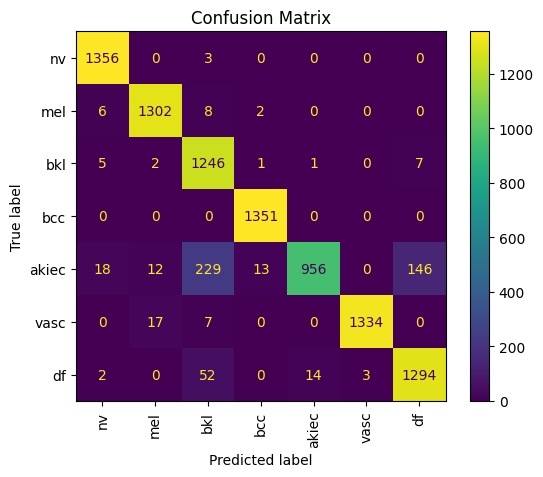

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions for the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation='vertical')  # Rotate x-axis labels for better readability
plt.title("Confusion Matrix")
plt.show()


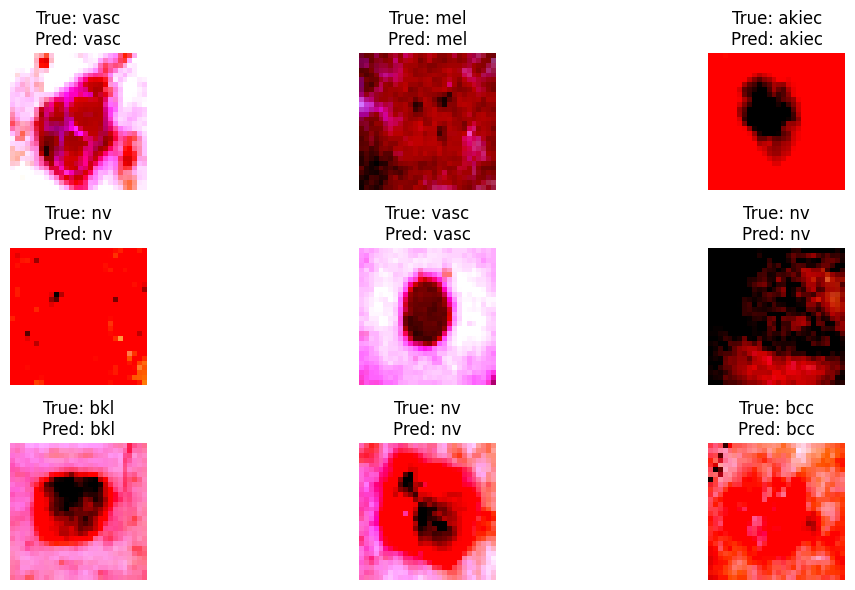

In [ ]:
import matplotlib.pyplot as plt

# Visualize some test images with predictions
plt.figure(figsize=(12, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"True: {class_names[Y_test[i]]}\nPred: {class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to preprocess and predict a single image
def predict_image(image_path, model, class_names):
    # Load the image
    img = load_img(image_path, target_size=(28, 28))  # Resize to the input size of the model
    img_array = img_to_array(img)                    # Convert image to array
    img_array = img_array / 255.0                    # Normalize pixel values (0-1 range)
    img_array = np.expand_dims(img_array, axis=0)    # Add batch dimension

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Return the predicted class name
    return class_names[predicted_class]

# Example usage
image_path = '/content/test1.png'  # Replace with your image path
predicted_class = predict_image(image_path, model, class_names)
print(f"The predicted class for the image is: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The predicted class for the image is: mel
